In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import xgboost as xgb 

In [13]:
df = pd.read_csv("C:\\Users\\mesho\\OneDrive\\Desktop\\ML Assignment\\case_time_series.csv")
df

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...
490,3 June 2021,2021-06-03,132424,28573286,206722,26589528,2717,340140
491,4 June 2021,2021-06-04,120454,28693740,197763,26787291,3372,343512
492,5 June 2021,2021-06-05,114488,28808228,189374,26976665,2682,346194
493,6 June 2021,2021-06-06,101209,28909437,174156,27150821,2444,348638


Let's do get some summary statastics of the dataframe 

In [14]:
df.shape

(495, 8)

In [15]:
df.dtypes

Date               object
Date_YMD           object
Daily Confirmed     int64
Total Confirmed     int64
Daily Recovered     int64
Total Recovered     int64
Daily Deceased      int64
Total Deceased      int64
dtype: object

As we can see that the Date_YMD column is an object type so we need to convert into time series from object type

In [16]:
df["Date_YMD"]=pd.to_datetime(df['Date_YMD'])
df.dtypes

Date                       object
Date_YMD           datetime64[ns]
Daily Confirmed             int64
Total Confirmed             int64
Daily Recovered             int64
Total Recovered             int64
Daily Deceased              int64
Total Deceased              int64
dtype: object

Successfully converted into time-series data type

In [17]:
df.drop(['Date'], axis=1,inplace=True)
df

,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-30,1,1,0,0,0,0
1,2020-01-31,0,1,0,0,0,0
2,2020-02-01,0,1,0,0,0,0
3,2020-02-02,1,2,0,0,0,0
4,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...
490,2021-06-03,132424,28573286,206722,26589528,2717,340140
491,2021-06-04,120454,28693740,197763,26787291,3372,343512
492,2021-06-05,114488,28808228,189374,26976665,2682,346194
493,2021-06-06,101209,28909437,174156,27150821,2444,348638


In [18]:
df.rename({'Date_YMD':'Date'}, axis=1, inplace=True)
print(df)

          Date  Daily Confirmed  Total Confirmed  Daily Recovered  \
0   2020-01-30                1                1                0   
1   2020-01-31                0                1                0   
2   2020-02-01                0                1                0   
3   2020-02-02                1                2                0   
4   2020-02-03                1                3                0   
..         ...              ...              ...              ...   
490 2021-06-03           132424         28573286           206722   
491 2021-06-04           120454         28693740           197763   
492 2021-06-05           114488         28808228           189374   
493 2021-06-06           101209         28909437           174156   
494 2021-06-07            85803         28995240           182866   

     Total Recovered  Daily Deceased  Total Deceased  
0                  0               0               0  
1                  0               0               0  
2     

### We know that infection rate is the ratio of daily confirmed cases and total population. But just by taking the ratio the value will definately be less, So to scale it to a value we are assuming k which can be multiples of 10 (taking  1000000 (rough approximation)) 

In [19]:
K = 1000000 
df['infection_rate'] = K * df['Daily Confirmed'] / 1366400000

In [20]:
df

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,infection_rate
0,2020-01-30,1,1,0,0,0,0,0.000732
1,2020-01-31,0,1,0,0,0,0,0.000000
2,2020-02-01,0,1,0,0,0,0,0.000000
3,2020-02-02,1,2,0,0,0,0,0.000732
4,2020-02-03,1,3,0,0,0,0,0.000732
...,...,...,...,...,...,...,...,...
490,2021-06-03,132424,28573286,206722,26589528,2717,340140,96.914520
491,2021-06-04,120454,28693740,197763,26787291,3372,343512,88.154274
492,2021-06-05,114488,28808228,189374,26976665,2682,346194,83.788056
493,2021-06-06,101209,28909437,174156,27150821,2444,348638,74.069819


In [21]:
df1 = df.reset_index()['infection_rate']

In [22]:
df1.shape

(495,)

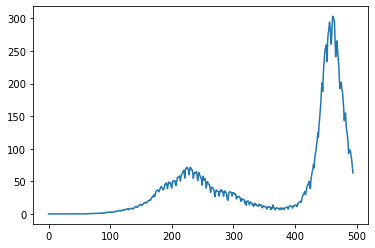

In [23]:
plt.plot(df1)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [26]:
df1.shape

(495, 1)

In [27]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [28]:
training_size,test_size

(321, 174)

In [29]:
train_data

array([[2.41382640e-06],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.41382640e-06],
       [2.41382640e-06],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [4.82765280e-06],
       [2.41382640e-06],
       [5.31041807e-05],
       [4.82765280e-06],
       [2.41382640e-06],
       [7.24147919e-06],
       [1.20691320e-05],
       [2.17244376e-05],


In [67]:
np.shape(test_size)

()

In [30]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [31]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [32]:
print(X_train.shape), print(y_train.shape)

(220, 100)
(220,)


(None, None)

In [33]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Model Training

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [35]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
4/4 [==============================] - 9s 929ms/step - loss: 0.0149 - val_loss: 0.2044
Epoch 2/100
4/4 [==============================] - 1s 152ms/step - loss: 0.0031 - val_loss: 0.1050
Epoch 3/100
4/4 [==============================] - 1s 146ms/step - loss: 0.0026 - val_loss: 0.1480
Epoch 4/100
4/4 [==============================] - 1s 138ms/step - loss: 0.0022 - val_loss: 0.1364
Epoch 5/100
4/4 [==============================] - 1s 130ms/step - loss: 0.0016 - val_loss: 0.0796
Epoch 6/100
4/4 [==============================] - 0s 126ms/step - loss: 0.0011 - val_loss: 0.0620
Epoch 7/100
4/4 [==============================] - 1s 132ms/step - loss: 8.1422e-04 - val_loss: 0.0654
Epoch 8/100
4/4 [==============================] - 0s 127ms/step - loss: 8.0198e-04 - val_loss: 0.0587
Epoch 9/100
4/4 [==============================] - 1s 133ms/step - loss: 5.9597e-04 - val_loss: 0.0541
Epoch 10/100
4/4 [==============================] - 0s 125ms/step - loss: 6.1922e-04 - val_loss: 

4/4 [==============================] - 1s 153ms/step - loss: 1.6385e-04 - val_loss: 0.0373
Epoch 81/100
4/4 [==============================] - 1s 159ms/step - loss: 1.4924e-04 - val_loss: 0.0347
Epoch 82/100
4/4 [==============================] - 1s 154ms/step - loss: 1.6305e-04 - val_loss: 0.0379
Epoch 83/100
4/4 [==============================] - 1s 151ms/step - loss: 1.6082e-04 - val_loss: 0.0378
Epoch 84/100
4/4 [==============================] - 1s 152ms/step - loss: 1.4078e-04 - val_loss: 0.0350
Epoch 85/100
4/4 [==============================] - 1s 165ms/step - loss: 1.4982e-04 - val_loss: 0.0337
Epoch 86/100
4/4 [==============================] - 1s 159ms/step - loss: 1.7936e-04 - val_loss: 0.0345
Epoch 87/100
4/4 [==============================] - 1s 169ms/step - loss: 1.8070e-04 - val_loss: 0.0316
Epoch 88/100
4/4 [==============================] - 1s 159ms/step - loss: 1.5460e-04 - val_loss: 0.0356
Epoch 89/100
4/4 [==============================] - 1s 158ms/step - loss: 1.7

In [38]:
import tensorflow as tf

In [39]:
tf.__version__

'2.4.1'

In [40]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [41]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [42]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

38.88384625389034

In [43]:
math.sqrt(mean_squared_error(ytest,test_predict))

140.20932339098852

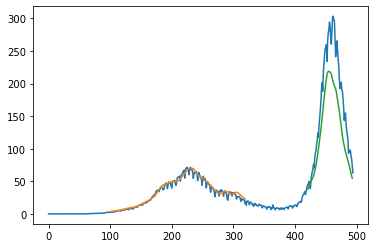

In [44]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [45]:
len(test_data)

174

In [55]:
x_input=test_data[74:].reshape(1,-1)
x_input.shape

(1, 100)

In [56]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [57]:
temp_input

[0.037689485372212034,
 0.029617649898619296,
 0.036202568311287056,
 0.042060924978275564,
 0.04061021531331467,
 0.0442309549097229,
 0.04519648546876509,
 0.045017862315342286,
 0.037059476682437004,
 0.04314231920440282,
 0.05515834701168292,
 0.056237327411412574,
 0.05997151684850826,
 0.06071738920536836,
 0.0639977792797142,
 0.05898667567828523,
 0.06968475427247273,
 0.08650671043738535,
 0.09579752824176886,
 0.09873998262044995,
 0.10576180361108431,
 0.11347156512503621,
 0.09808824949309647,
 0.11402674519648548,
 0.12894419233368737,
 0.14261610504972483,
 0.15032345273727915,
 0.15118277493482668,
 0.16463744327507968,
 0.13554117987834316,
 0.1285048759293232,
 0.1740682630105243,
 0.19648064111229122,
 0.21488606739403304,
 0.22447137201892442,
 0.25054069711306365,
 0.2330863184319784,
 0.2783431495606836,
 0.3048083421840302,
 0.3183305976634161,
 0.34987206720092695,
 0.36826542435068077,
 0.41014289852273833,
 0.3882350101380709,
 0.4472747899971035,
 0.4817611277

In [59]:
#prediction for next 150 days
from numpy import array

lst_output=[]
n_steps=99
i=0
while(i<50):
    
    if(len(temp_input)>74):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.02961765 0.03620257 0.04206092 0.04061022 0.04423095 0.04519649
 0.04501786 0.03705948 0.04314232 0.05515835 0.05623733 0.05997152
 0.06071739 0.06399778 0.05898668 0.06968475 0.08650671 0.09579753
 0.09873998 0.1057618  0.11347157 0.09808825 0.11402675 0.12894419
 0.14261611 0.15032345 0.15118277 0.16463744 0.13554118 0.12850488
 0.17406826 0.19648064 0.21488607 0.22447137 0.2505407  0.23308632
 0.27834315 0.30480834 0.3183306  0.34987207 0.36826542 0.4101429
 0.38823501 0.44727479 0.48176113 0.52338515 0.5648402  0.62975524
 0.66395433 0.62036063 0.71054601 0.76217051 0.80267211 0.8334846
 0.84241576 0.85608284 0.77114753 0.87600898 0.91581539 0.93360288
 0.97039201 0.94761031 0.89333301 0.8587646  0.92412619 0.9960027
 1.         0.98218838 0.97472241 0.88455875 0.79533407 0.84135126
 0.87533069 0.82795452 0.78752535 0.75011345 0.68030559 0.63488703
 0.64508545 0.66666747 0.62576518 0.62107512 0.58148354 0.53788259
 0.4727648  0.50447041 0.51054842 0.44915275 0.420206

10 day output [[0.01928091]]
11 day input [0.05997152 0.06071739 0.06399778 0.05898668 0.06968475 0.08650671
 0.09579753 0.09873998 0.1057618  0.11347157 0.09808825 0.11402675
 0.12894419 0.14261611 0.15032345 0.15118277 0.16463744 0.13554118
 0.12850488 0.17406826 0.19648064 0.21488607 0.22447137 0.2505407
 0.23308632 0.27834315 0.30480834 0.3183306  0.34987207 0.36826542
 0.4101429  0.38823501 0.44727479 0.48176113 0.52338515 0.5648402
 0.62975524 0.66395433 0.62036063 0.71054601 0.76217051 0.80267211
 0.8334846  0.84241576 0.85608284 0.77114753 0.87600898 0.91581539
 0.93360288 0.97039201 0.94761031 0.89333301 0.8587646  0.92412619
 0.9960027  1.         0.98218838 0.97472241 0.88455875 0.79533407
 0.84135126 0.87533069 0.82795452 0.78752535 0.75011345 0.68030559
 0.63488703 0.64508545 0.66666747 0.62576518 0.62107512 0.58148354
 0.53788259 0.4727648  0.50447041 0.51054842 0.44915275 0.42020614
 0.39896205 0.37027131 0.30627353 0.32140581 0.32355895 0.31964855
 0.29075504 0.27635416

20 day output [[-0.08426868]]
21 day input [ 0.09808825  0.11402675  0.12894419  0.14261611  0.15032345  0.15118277
  0.16463744  0.13554118  0.12850488  0.17406826  0.19648064  0.21488607
  0.22447137  0.2505407   0.23308632  0.27834315  0.30480834  0.3183306
  0.34987207  0.36826542  0.4101429   0.38823501  0.44727479  0.48176113
  0.52338515  0.5648402   0.62975524  0.66395433  0.62036063  0.71054601
  0.76217051  0.80267211  0.8334846   0.84241576  0.85608284  0.77114753
  0.87600898  0.91581539  0.93360288  0.97039201  0.94761031  0.89333301
  0.8587646   0.92412619  0.9960027   1.          0.98218838  0.97472241
  0.88455875  0.79533407  0.84135126  0.87533069  0.82795452  0.78752535
  0.75011345  0.68030559  0.63488703  0.64508545  0.66666747  0.62576518
  0.62107512  0.58148354  0.53788259  0.4727648   0.50447041  0.51054842
  0.44915275  0.42020614  0.39896205  0.37027131  0.30627353  0.32140581
  0.32355895  0.31964855  0.29075504  0.27635416  0.24430096  0.20711355
  0.16229

30 day output [[-0.16231577]]
31 day input [ 0.19648064  0.21488607  0.22447137  0.2505407   0.23308632  0.27834315
  0.30480834  0.3183306   0.34987207  0.36826542  0.4101429   0.38823501
  0.44727479  0.48176113  0.52338515  0.5648402   0.62975524  0.66395433
  0.62036063  0.71054601  0.76217051  0.80267211  0.8334846   0.84241576
  0.85608284  0.77114753  0.87600898  0.91581539  0.93360288  0.97039201
  0.94761031  0.89333301  0.8587646   0.92412619  0.9960027   1.
  0.98218838  0.97472241  0.88455875  0.79533407  0.84135126  0.87533069
  0.82795452  0.78752535  0.75011345  0.68030559  0.63488703  0.64508545
  0.66666747  0.62576518  0.62107512  0.58148354  0.53788259  0.4727648
  0.50447041  0.51054842  0.44915275  0.42020614  0.39896205  0.37027131
  0.30627353  0.32140581  0.32355895  0.31964855  0.29075504  0.27635416
  0.24430096  0.20711355  0.16229749  0.15147498  0.1387938   0.12452791
  0.10919772  0.09336245  0.07750528  0.06198643  0.04703935  0.03278941
  0.01928091  0.0

40 day output [[-0.24726056]]
41 day input [ 0.4101429   0.38823501  0.44727479  0.48176113  0.52338515  0.5648402
  0.62975524  0.66395433  0.62036063  0.71054601  0.76217051  0.80267211
  0.8334846   0.84241576  0.85608284  0.77114753  0.87600898  0.91581539
  0.93360288  0.97039201  0.94761031  0.89333301  0.8587646   0.92412619
  0.9960027   1.          0.98218838  0.97472241  0.88455875  0.79533407
  0.84135126  0.87533069  0.82795452  0.78752535  0.75011345  0.68030559
  0.63488703  0.64508545  0.66666747  0.62576518  0.62107512  0.58148354
  0.53788259  0.4727648   0.50447041  0.51054842  0.44915275  0.42020614
  0.39896205  0.37027131  0.30627353  0.32140581  0.32355895  0.31964855
  0.29075504  0.27635416  0.24430096  0.20711355  0.16229749  0.15147498
  0.1387938   0.12452791  0.10919772  0.09336245  0.07750528  0.06198643
  0.04703935  0.03278941  0.01928091  0.00650407 -0.00558265 -0.01703618
 -0.02791817 -0.03828887 -0.04820431 -0.05771546 -0.06686874 -0.07570663
 -0.08426

49 day output [[-0.35094935]]
[[0.16229748725891113], [0.1514749825000763], [0.13879379630088806], [0.12452790886163712], [0.1091977208852768], [0.09336245059967041], [0.07750527560710907], [0.06198642775416374], [0.04703935235738754], [0.032789409160614014], [0.01928091049194336], [0.00650407187640667], [-0.005582650192081928], [-0.017036177217960358], [-0.027918174862861633], [-0.03828887268900871], [-0.04820431396365166], [-0.057715464383363724], [-0.06686873733997345], [-0.07570663094520569], [-0.08426868170499802], [-0.0925922840833664], [-0.10071317106485367], [-0.108665831387043], [-0.11648370325565338], [-0.12419918924570084], [-0.1318439394235611], [-0.1394486427307129], [-0.14704300463199615], [-0.15465599298477173], [-0.16231577098369598], [-0.1700497418642044], [-0.17788459360599518], [-0.18584662675857544], [-0.19396142661571503], [-0.20225438475608826], [-0.21075044572353363], [-0.21947447955608368], [-0.22845110297203064], [-0.23770491778850555], [-0.24726055562496185], 

In [64]:
day_new=np.arange(1,101)
day_pred=np.arange(101,151)

In [65]:
import matplotlib.pyplot as plt

In [66]:
len(df1)

495

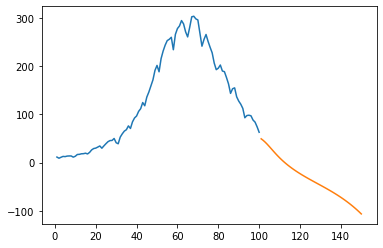

In [67]:
plt.plot(day_new,scaler.inverse_transform(df1[395:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

As We can see that for the next 50 Days the Total case prediction will drop out to this value 

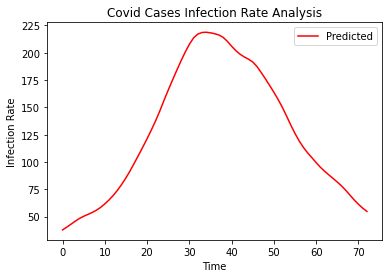

In [68]:
# Visualising the results
plt.plot(test_predict, color = 'red', label = 'Predicted')
plt.title('Covid Cases Infection Rate Analysis')
plt.xlabel('Time')
plt.ylabel('Infection Rate')
plt.legend()
plt.show()